In [11]:
from typing import TypedDict, List
from langgraph.graph import StateGraph
from IPython.display import Image, display

In [5]:
class AgentState(TypedDict):
    name: str
    age: int
    skills: List[str]
    result: str    

In [35]:
def greeting_node(state: AgentState) -> AgentState:
    state["result"] = f"Hi {state["name"]}! Hope you are doing well."
    return state

def age_desc_node(state: AgentState) -> AgentState:
    state["result"] += f"You are {state["age"]} years old."
    return state

def desc_skills(state: AgentState) -> AgentState:
    skills = ','.join(state["skills"])
    state["result"] += f"You are equipped with these skills - " + skills
    return state

In [36]:
graph = StateGraph(AgentState)

In [37]:
graph.add_node("greeting", greeting_node)
graph.add_node("age", age_desc_node)
graph.add_node("skills", desc_skills)
graph.set_entry_point("greeting")
graph.add_edge("greeting", "age")
graph.add_edge("age", "skills")
graph.set_finish_point("skills")
app = graph.compile()

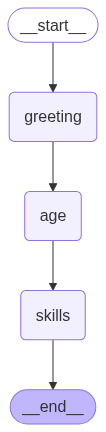

In [38]:
display(Image(app.get_graph().draw_mermaid_png()))

In [39]:
result = app.invoke({"name":"John Doe", "age": 39, "skills": ["drawing", "painting"]})

In [40]:
result

{'name': 'John Doe',
 'age': 39,
 'skills': ['drawing', 'painting'],
 'result': 'Hi John Doe! Hope you are doing well.You are 39 years old.You are equipped with these skills - drawing,painting'}